# Challenge Data Science

## SEMANA 01
#### Importação e limpeza dos dados

### IMPORTAÇÃO DE BIBLIOTECAS

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### IMPORTAÇÃO DO DATASET

In [2]:
fonte = 'https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json'
dados = pd.read_json(fonte)
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


obs:As columas 'customer', 'phone', 'internet' e 'account' apresentam dados em formato JSON, que precisam ser extraidos.

In [4]:
#Extraindo os dados da coluna 'customer'
dados_customer = pd.json_normalize(dados.customer)
dados_customer

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [5]:
#Extraindo os dados da coluna 'phone'
dados_phone = pd.json_normalize(dados.phone)
dados_phone

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No


In [6]:
#Extraindo os dados da coluna 'internet'
dados_internet = pd.json_normalize(dados.internet)
dados_internet

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
7262,DSL,Yes,No,No,Yes,No,No
7263,Fiber optic,No,No,No,No,No,Yes
7264,DSL,No,Yes,No,No,No,No
7265,DSL,Yes,No,Yes,Yes,No,Yes


In [7]:
#Extraindo os dados da coluna 'account'
dados_account = pd.json_normalize(dados.account)
dados_account

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


In [8]:
#Excluindo colunas
dados.drop(columns=['customer', 'phone', 'internet', 'account'],axis=1,inplace=True)

In [9]:
#Concatenando o dataset
dataset = pd.concat([dados,dados_customer,dados_phone,dados_internet,dados_account], axis=1)
dataset.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [10]:
#Verificando totas as colunas
dataset.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

#### TRADUZINDO O DATASET

In [11]:
dataset.columns = ['ID', 'Churn', 'Sexo', 'Idoso', 'Parceiro', 'Dependentes', 'Meses_contrato', 'Assinatura_tel',
                 'Multiplas_assinatura_tel', 'Internet', 'Segurança_online', 'Backup_online', 'Proteção_dispositivo',
                 'Suporte_técnico', 'Tv_a_cabo', 'Streaming_filmes', 'Tipo_contrato', 'Faturamento_digital','Forma_de_pagamento',
                 'Cobranças_mensais', 'Total_cobranças']
dataset.head()

,ID,Churn,Sexo,Idoso,Parceiro,Dependentes,Meses_contrato,Assinatura_tel,Multiplas_assinatura_tel,Internet,...,Backup_online,Proteção_dispositivo,Suporte_técnico,Tv_a_cabo,Streaming_filmes,Tipo_contrato,Faturamento_digital,Forma_de_pagamento,Cobranças_mensais,Total_cobranças
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [12]:
#Visualizar o tamanho do dataset
print(f'O dataset possui {dataset.shape[0]} Linhas e {dataset.shape[1]} Colunas')

O dataset possui 7267 Linhas e 21 Colunas


In [13]:
#Verificando os tipos de dados
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        7267 non-null   object 
 1   Churn                     7267 non-null   object 
 2   Sexo                      7267 non-null   object 
 3   Idoso                     7267 non-null   int64  
 4   Parceiro                  7267 non-null   object 
 5   Dependentes               7267 non-null   object 
 6   Meses_contrato            7267 non-null   int64  
 7   Assinatura_tel            7267 non-null   object 
 8   Multiplas_assinatura_tel  7267 non-null   object 
 9   Internet                  7267 non-null   object 
 10  Segurança_online          7267 non-null   object 
 11  Backup_online             7267 non-null   object 
 12  Proteção_dispositivo      7267 non-null   object 
 13  Suporte_técnico           7267 non-null   object 
 14  Tv_a_cab

obs:O tipo de dado de Total_cobranças (20) é string, terá que alterar para float

### TRATAMENTO DE DADOS

In [14]:
#Verificando se há valores nulos
dataset.isnull().sum()

ID                          0
Churn                       0
Sexo                        0
Idoso                       0
Parceiro                    0
Dependentes                 0
Meses_contrato              0
Assinatura_tel              0
Multiplas_assinatura_tel    0
Internet                    0
Segurança_online            0
Backup_online               0
Proteção_dispositivo        0
Suporte_técnico             0
Tv_a_cabo                   0
Streaming_filmes            0
Tipo_contrato               0
Faturamento_digital         0
Forma_de_pagamento          0
Cobranças_mensais           0
Total_cobranças             0
dtype: int64

In [15]:
#Foi identificado valores vazio na coluna 'total_cobranças'.
dataset.query("Total_cobranças == ' '")

,ID,Churn,Sexo,Idoso,Parceiro,Dependentes,Meses_contrato,Assinatura_tel,Multiplas_assinatura_tel,Internet,...,Backup_online,Proteção_dispositivo,Suporte_técnico,Tv_a_cabo,Streaming_filmes,Tipo_contrato,Faturamento_digital,Forma_de_pagamento,Cobranças_mensais,Total_cobranças
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [16]:
#Trocando valores vazio da coluna 'total_cobrança' por 0
dataset['Total_cobranças'].replace(' ', 0, inplace=True)

In [17]:
#Alterando o tipo de dado de string para float
dataset['Total_cobranças'] = dataset['Total_cobranças'].astype('float')

In [18]:
#Foi identificado valores vazio na coluna 'Churn'.
dataset.query("Churn == ''")

,ID,Churn,Sexo,Idoso,Parceiro,Dependentes,Meses_contrato,Assinatura_tel,Multiplas_assinatura_tel,Internet,...,Backup_online,Proteção_dispositivo,Suporte_técnico,Tv_a_cabo,Streaming_filmes,Tipo_contrato,Faturamento_digital,Forma_de_pagamento,Cobranças_mensais,Total_cobranças
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.20
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90


In [19]:
dataset['Churn'].value_counts()

No     5174
Yes    1869
        224
Name: Churn, dtype: int64

In [20]:
#Alterando valores vazio na coluna 'Churn' para não informado.
dataset['Churn'].replace('', 'Não informado', inplace=True)

In [21]:
dataset['Churn'].value_counts()

No               5174
Yes              1869
Não informado     224
Name: Churn, dtype: int64

## SEMANA 02
#### Analisar a variável target Churn

In [22]:
dataset['Churn'].value_counts()

No               5174
Yes              1869
Não informado     224
Name: Churn, dtype: int64

In [23]:
#Quantidades de chun
ativos = dataset['Churn'].value_counts()[0]
cancelados = dataset['Churn'].value_counts()[1]
print(f'Planos ativos: {ativos}\nPlanos cancelados: {cancelados}')

Planos ativos: 5174
Planos cancelados: 1869


Text(0, 0.5, 'Quantidade')

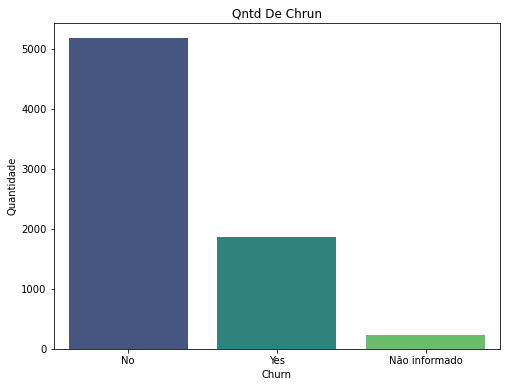

In [24]:
#Visualizando Quantidades de churn no grafico de barra
plt.figure(figsize=(8,6))
sns.countplot(x='Churn', data=dataset, palette='viridis')
plt.title('Qntd De Chrun')
plt.ylabel('Quantidade')

<AxesSubplot:ylabel='Churn'>

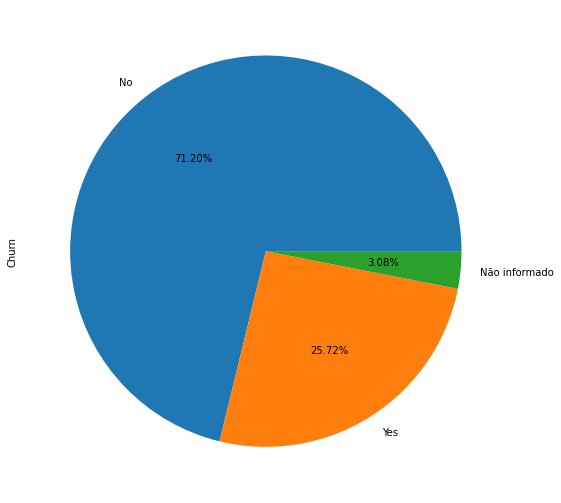

In [25]:
#Visualizando a porcentagem de churn no grafico de pizza
plt.figure(figsize=(12,9))
dataset['Churn'].value_counts().plot(kind='pie', autopct='%.2f%%')

#### Criando Visualizações Relevantes em Relação ao Churn

In [26]:
#Removendo o valor 'Não informado' para melhor visualização do churn
Não_informado = dataset.query("Churn == 'Não informado'").index
dataset_churn = dataset.drop(Não_informado)
dataset_churn['Churn'].unique()

array(['No', 'Yes'], dtype=object)

Text(0.5, 1.0, 'Tempo de contrato x Churn')

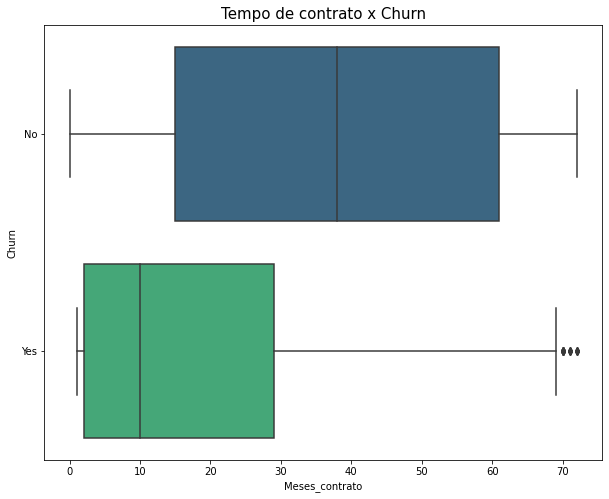

In [27]:
#Visualizando boxplot do tempo de contrato e o churn
plt.figure(figsize=(10,8))
sns.boxplot(x='Meses_contrato', y='Churn', data=dataset_churn, palette='viridis')
plt.title('Tempo de contrato x Churn', fontsize=15)

Obs: No Boxplot foi possivel visualizar que os clientes que cancelaram estão concentrados entre 5 e 30 meses

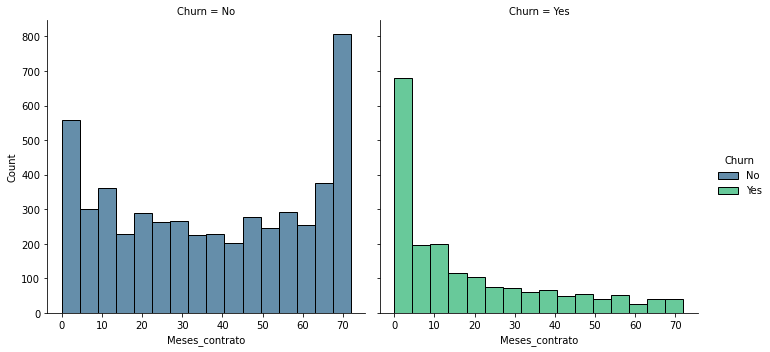

In [28]:
#Visualizando grafico de histograma do tempo de contrato e o churn separados
sns.displot(data=dataset_churn, x='Meses_contrato', col='Churn', hue='Churn', palette='viridis')

Obs: A grande maioria dos clientes que cancelaram são clientes novos, nos primeiros meses

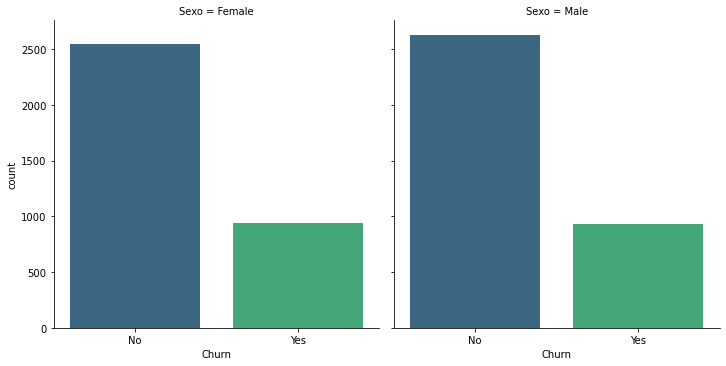

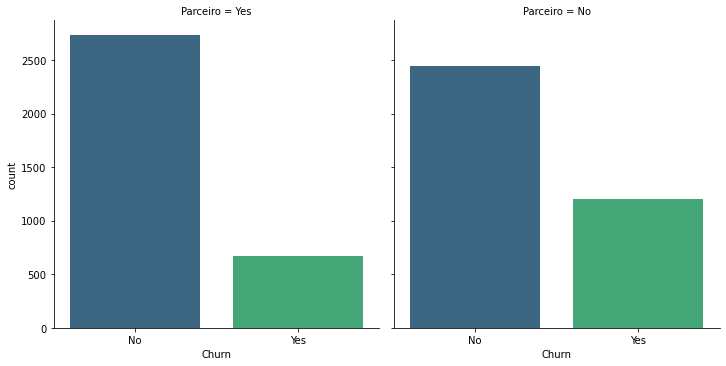

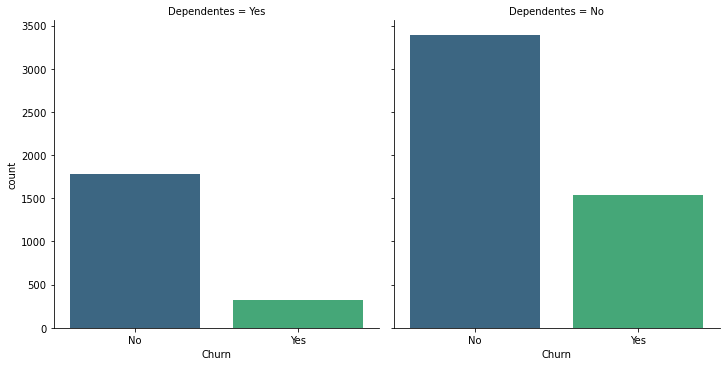

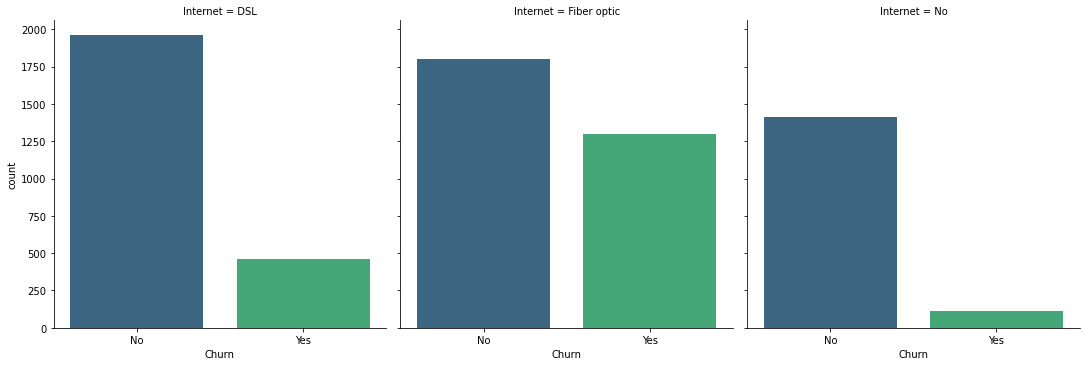

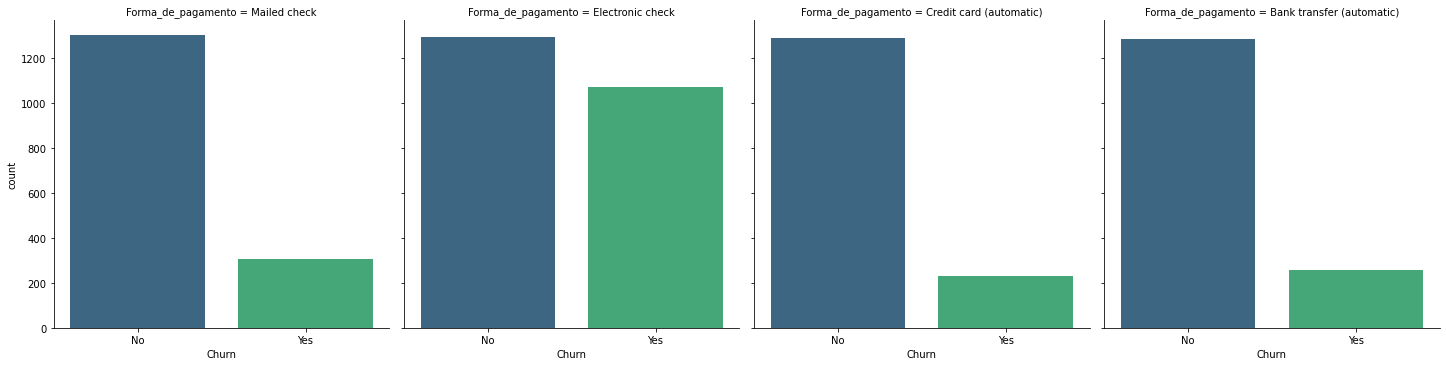

In [41]:
#lista com as variáveis categóricas que serão analisadas
cols = ['Sexo', 'Parceiro', 'Dependentes','Internet','Forma_de_pagamento' ]


for col in cols:
  # sns.displot(data=df, x=col, hue='cancelou_plano', multiple='dodge') #não está funcionando como eu queria
  sns.catplot(x='Churn', col=col, kind='count', data=dataset_churn, palette='viridis')

Obs: Nesses graficos foi possivel identificar que maioria dos clientes que cancelaram não tem dependentes,
    a internet é fibra óptica, e a maioria com a forma de pagamento por cheque eletrônico
    

#### Correlação

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        7267 non-null   object 
 1   Churn                     7267 non-null   object 
 2   Sexo                      7267 non-null   object 
 3   Idoso                     7267 non-null   int64  
 4   Parceiro                  7267 non-null   object 
 5   Dependentes               7267 non-null   object 
 6   Meses_contrato            7267 non-null   int64  
 7   Assinatura_tel            7267 non-null   object 
 8   Multiplas_assinatura_tel  7267 non-null   object 
 9   Internet                  7267 non-null   object 
 10  Segurança_online          7267 non-null   object 
 11  Backup_online             7267 non-null   object 
 12  Proteção_dispositivo      7267 non-null   object 
 13  Suporte_técnico           7267 non-null   object 
 14  Tv_a_cab

Obs: Para calcular a correlação, é necessário transformar os valores das variáveis em valores numéricos.

In [32]:
dataset_copia = dataset.copy()

In [33]:
#Listando as colunas que serão convertidas
dataset_copia.select_dtypes(include=object).columns

Index(['ID', 'Churn', 'Sexo', 'Parceiro', 'Dependentes', 'Assinatura_tel',
       'Multiplas_assinatura_tel', 'Internet', 'Segurança_online',
       'Backup_online', 'Proteção_dispositivo', 'Suporte_técnico', 'Tv_a_cabo',
       'Streaming_filmes', 'Tipo_contrato', 'Faturamento_digital',
       'Forma_de_pagamento'],
      dtype='object')

In [34]:
#Convertendo para categórico
for i in ['Churn', 'Sexo', 'Parceiro', 'Dependentes', 'Assinatura_tel',
       'Multiplas_assinatura_tel', 'Internet', 'Segurança_online',
       'Backup_online', 'Proteção_dispositivo', 'Suporte_técnico', 'Tv_a_cabo',
       'Streaming_filmes', 'Tipo_contrato', 'Faturamento_digital',
       'Forma_de_pagamento']:
    dataset_copia[i] = dataset_copia[i].astype('category')
dataset_copia.dtypes

ID                            object
Churn                       category
Sexo                        category
Idoso                          int64
Parceiro                    category
Dependentes                 category
Meses_contrato                 int64
Assinatura_tel              category
Multiplas_assinatura_tel    category
Internet                    category
Segurança_online            category
Backup_online               category
Proteção_dispositivo        category
Suporte_técnico             category
Tv_a_cabo                   category
Streaming_filmes            category
Tipo_contrato               category
Faturamento_digital         category
Forma_de_pagamento          category
Cobranças_mensais            float64
Total_cobranças              float64
dtype: object

In [35]:
#Convertendo para inteiro
for i in ['Churn', 'Sexo', 'Parceiro', 'Dependentes', 'Assinatura_tel',
       'Multiplas_assinatura_tel', 'Internet', 'Segurança_online',
       'Backup_online', 'Proteção_dispositivo', 'Suporte_técnico', 'Tv_a_cabo',
       'Streaming_filmes', 'Tipo_contrato', 'Faturamento_digital',
       'Forma_de_pagamento']:
    dataset_copia[i] = dataset_copia[i].cat.codes
    
dataset_copia.dtypes

ID                           object
Churn                          int8
Sexo                           int8
Idoso                         int64
Parceiro                       int8
Dependentes                    int8
Meses_contrato                int64
Assinatura_tel                 int8
Multiplas_assinatura_tel       int8
Internet                       int8
Segurança_online               int8
Backup_online                  int8
Proteção_dispositivo           int8
Suporte_técnico                int8
Tv_a_cabo                      int8
Streaming_filmes               int8
Tipo_contrato                  int8
Faturamento_digital            int8
Forma_de_pagamento             int8
Cobranças_mensais           float64
Total_cobranças             float64
dtype: object

In [36]:
dataset_copia.head(11)

,ID,Churn,Sexo,Idoso,Parceiro,Dependentes,Meses_contrato,Assinatura_tel,Multiplas_assinatura_tel,Internet,...,Backup_online,Proteção_dispositivo,Suporte_técnico,Tv_a_cabo,Streaming_filmes,Tipo_contrato,Faturamento_digital,Forma_de_pagamento,Cobranças_mensais,Total_cobranças
0,0002-ORFBO,0,0,0,1,1,9,1,0,0,...,2,0,2,2,0,1,1,3,65.60,593.30
1,0003-MKNFE,0,1,0,0,0,9,1,2,0,...,0,0,0,0,2,0,0,3,59.90,542.40
2,0004-TLHLJ,2,1,0,0,0,4,1,0,1,...,0,2,0,0,0,0,1,2,73.90,280.85
3,0011-IGKFF,2,1,1,1,0,13,1,0,1,...,2,2,0,2,2,0,1,2,98.00,1237.85
4,0013-EXCHZ,2,0,1,1,0,3,1,0,1,...,0,0,2,2,0,0,1,3,83.90,267.40
5,0013-MHZWF,0,0,0,0,1,9,1,0,0,...,0,0,2,2,2,0,1,1,69.40,571.45
6,0013-SMEOE,0,0,1,1,0,71,1,0,1,...,2,2,2,2,2,2,1,0,109.70,7904.25
7,0014-BMAQU,0,1,0,1,0,63,1,2,1,...,0,0,2,0,0,2,1,1,84.65,5377.80
8,0015-UOCOJ,0,0,1,0,0,7,1,0,0,...,0,0,0,0,0,0,1,2,48.20,340.35
9,0016-QLJIS,0,0,0,1,1,65,1,2,0,...,2,2,2,2,2,2,1,3,90.45,5957.90


<AxesSubplot:>

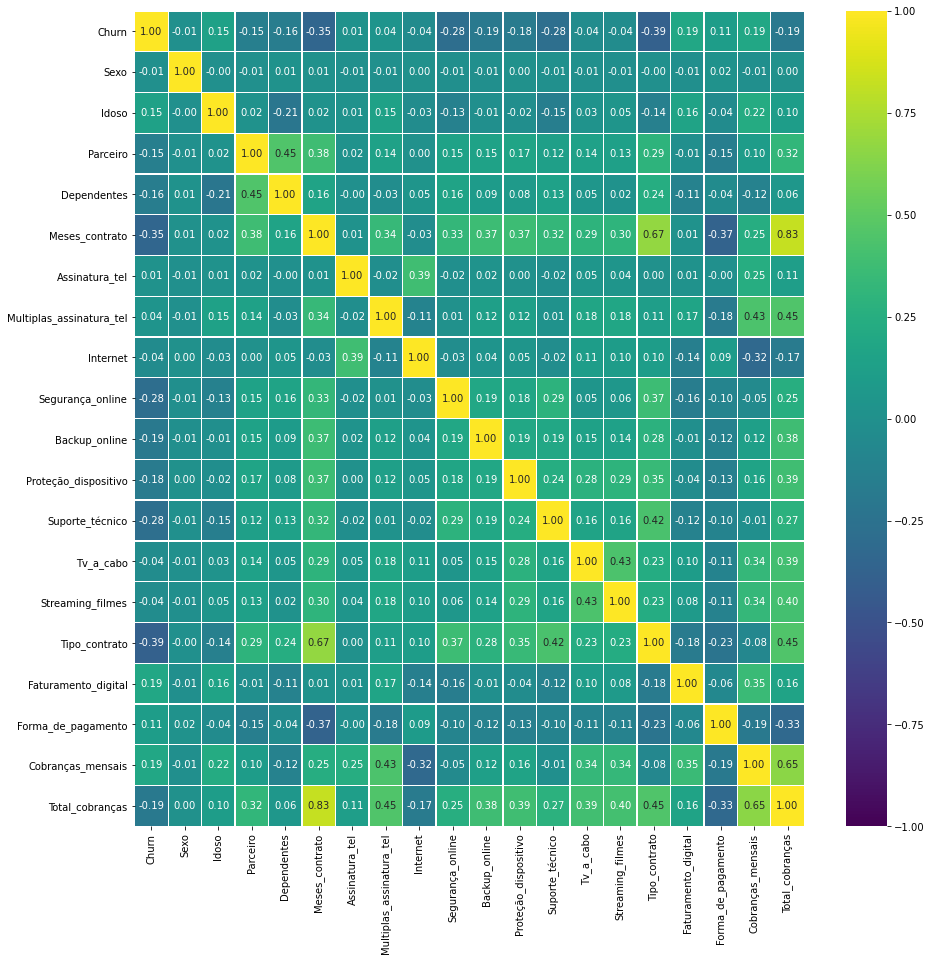

In [45]:
plt.figure(figsize=(15,15))
sns.heatmap(dataset_copia.corr(), annot=True, fmt='.2f', linewidths=.3, vmin=-1, vmax=1, cmap='viridis')
# annot mostra o valor da correlação em cada célula;
# fmt formata os valores para um float com duas casas decimais;
# Para facilitar a interpretação da graduação das cores, vmin e vmax foram 
# deixados nos extremos da matriz de correlação ([1, -1])
# linewidths aumenta a espessura da linha entre as variaveis

As cores amarela e roxo nesse heatmap indicam a força da correlação (cujo resultado é um valor entre 1 e -1). Conforme vão se aproximando dos extremos, a correlação aumenta, pois os valores vão se aproximando de [-1, 1].

Visualmente, as cores predominantes estão entre verde e azul escuro, que são cores mais próximas do 0, o que indica que a correlação entre as variáveis da base de dados é fraca ou nem mesmo possuem correlação.

### Conclusões:

Através do estudo das variáveis, foi possível traçar um perfil do cliente que abandona a empresa, sendo este:
    
Clientes nos primeiros meses;

Sem dependentes;

Pagamento por cheque eletrônico;

Possui serviços de fibra óptica;
